# The regression question

When we go to shopping and approach the till with a basket full of groceries to pay, we usually have an estimate of how much we are going to spend. Also, when we organize a pizza night and invite 10 people we have to know more or less how many pizzas to provide more or less. The estimate we produce is simply based on the previous experiences and our ability to put things in proportion. Machines can also provide estimates for numerical quantities in a similar way.

Let's assume that we want to buy a house with 6 rooms and we have a budge of $30,000. With the right data, we can teach our machine to predict the price of our dreams.

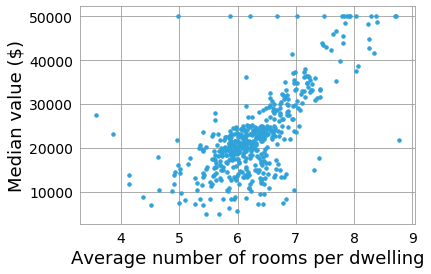

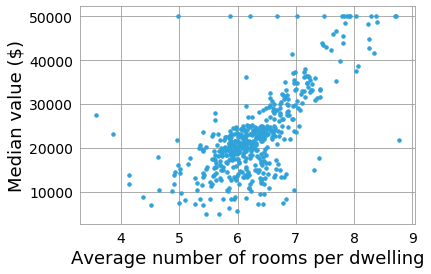

In [120]:
from mlpages_lib import *
%matplotlib inline
from sklearn.datasets import load_boston

dataset = load_boston()
data = dataset['data']
target = dataset['target']*1000
features = dataset['feature_names']

fig = plt.figure()
plt.scatter(data[:, 5], target, s=12)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value ($)')
glue("fig_boston_1", fig, display=False)

```{glue:figure} fig_boston_1
:name: "fig-boston-1"

Number of rooms versus value for each suburb in Boston.
```

The {ref}`figure above <fig-boston-1>` shows the relationship between the number of rooms in a house and its value {cite}`boston_dataset`. Looking at the data we note that the more the rooms, the more expensive is the house. We can express this relation with a model and use the model to produce the estimate that we look for.

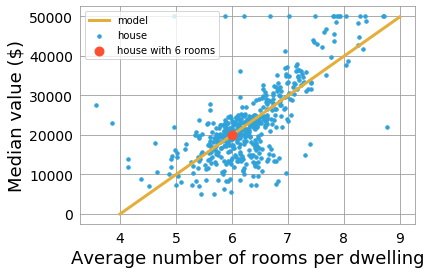

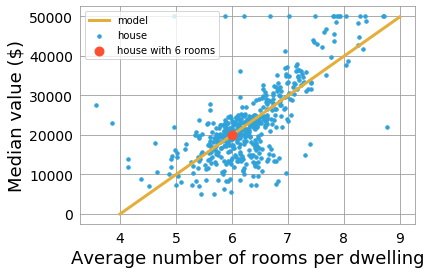

In [123]:
from sklearn.linear_model import HuberRegressor

fig = plt.figure()
plt.scatter(data[:, 5], target, s=12, label='house')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value ($)')
regressor = HuberRegressor()
regressor.fit(data[:, 5].reshape(-1, 1), target)
xx = np.linspace(4, 9, 100)
plt.plot(xx, regressor.predict(xx.reshape(-1, 1)), c='C2', label='model')
plt.scatter([6.], regressor.predict(np.array([6.]).reshape(-1, 1)), c='C1', 
            label='house with 6 rooms', zorder=4, s=80)
plt.legend()
glue("bostong_fig_2", fig, display=False)

```{glue:figure} bostong_fig_2
:name: "fig-boston-2"

Model that predicts the value of the houses Boston given the number of rooms.
```

In this new {ref}`version of the figure <fig-boston-2>` we have highlighted a possible model. It's a line that fits our  insight and goes through the main points of the chart. Now we have the ability to pick any value on the x axis and produce the estimate that we need. To answer our initial question, we can see that the average price for a house with 6 rooms is $20,000. Well on our budget. Yay!

The secret to build these models is in creating a line that best fits the original points. We'll see a more rigorous approach later in this book.

```{warning}
You might have noticed that in that chart the model suggests that houses with 4 rooms have a value of $0. Of course this doesn't reflect reality and highlights the fact that the results of this model can't be blindly accepted.
```